<a href="https://colab.research.google.com/github/nandana-sajju-pillai/assignment_/blob/main/case_study_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Customer Churn Prediction

Objective: You are tasked with developing a machine learning model to predict customer churn
for a telecommunications company. The company wants to identify which customers are likely to
leave (churn) and target them with retention offers. Your goal is to create a machine learning
model that accurately predicts customer churn based on historical customer data.


## Libraries

In [219]:
import pandas as pd # For handling tabular data
import numpy as np # For numerical operations
from google.colab import drive # to mount google drive
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting graphs
from sklearn.preprocessing import LabelEncoder # for label encoding
from sklearn.preprocessing import StandardScaler # For scaling numeric features
from sklearn.linear_model import LogisticRegression # to create logistic regression model
from sklearn.neighbors import KNeighborsClassifier # to create k-NN model
from sklearn.naive_bayes import GaussianNB # to create Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # to create Decision Tree model
from sklearn.ensemble import RandomForestClassifier # to create Random Forest model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV # For hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # to calculate accuracy, precision , recall anf f1
from sklearn.model_selection import cross_val_score, KFold# for the calculation of cross validation score
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, StackingClassifier # to perform bagging, boosting and stacking

In [220]:
# mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
train = pd.read_csv("/content/drive/MyDrive/DSA_B6/data/Training_data.csv")
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [222]:
test = pd.read_csv("/content/drive/MyDrive/DSA_B6/data/Testing_data.csv")
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


## EDA

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


### Duplicates

In [225]:
train.duplicated().sum()

np.int64(0)

In [226]:
test.duplicated().sum()

np.int64(0)

In [227]:
missing_train = train.isnull().sum()
missing_train

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [228]:
missing_test = test.isnull().sum()
missing_test

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Outlier Detection

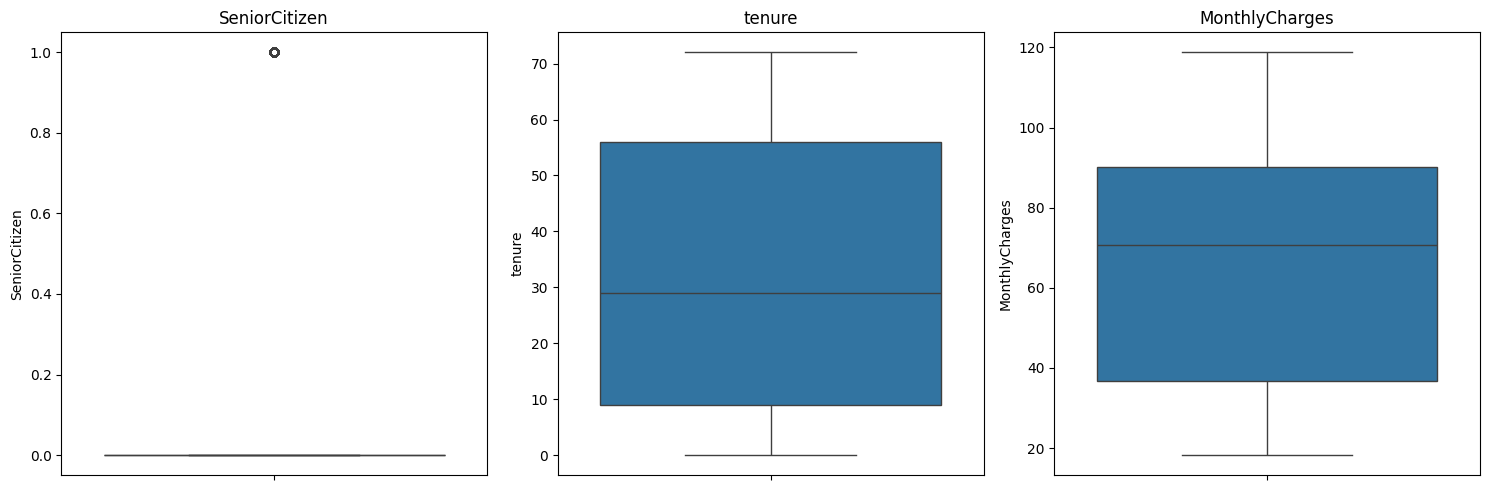

In [229]:
# Select numeric columns only
numeric_cols_train = train.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols_train, 1):
    plt.subplot(1, len(numeric_cols_train), i)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

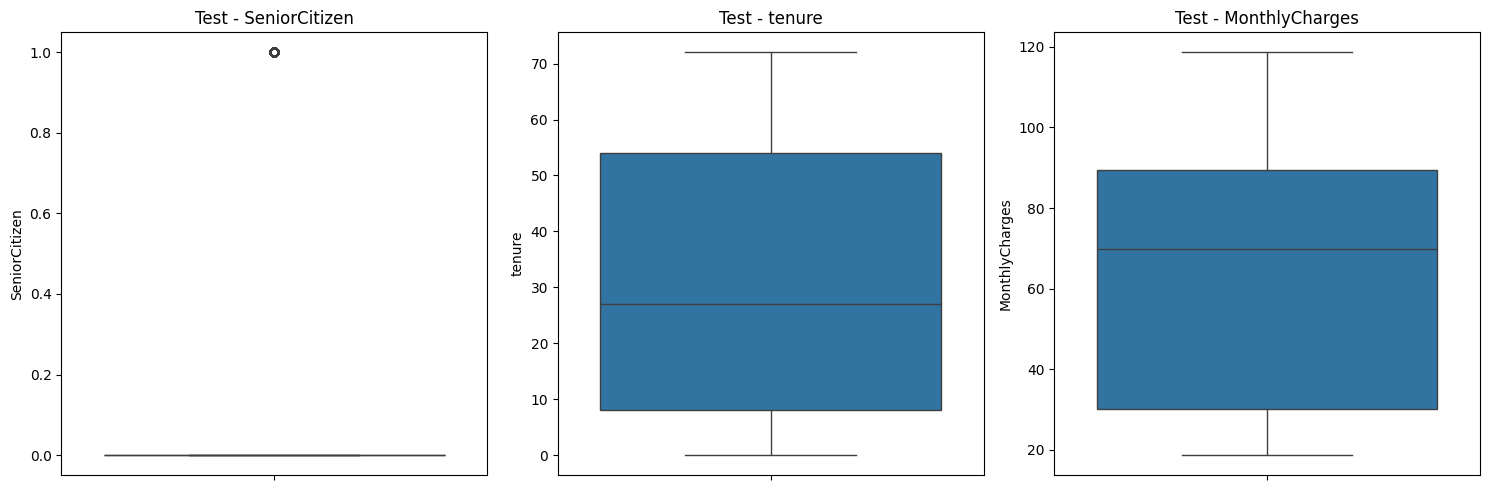

In [230]:
# Numeric columns in test
numeric_cols_test = test.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols_test, 1):
    plt.subplot(1, len(numeric_cols_test), i)
    sns.boxplot(y=test[col])
    plt.title(f"Test - {col}")
plt.tight_layout()
plt.show()

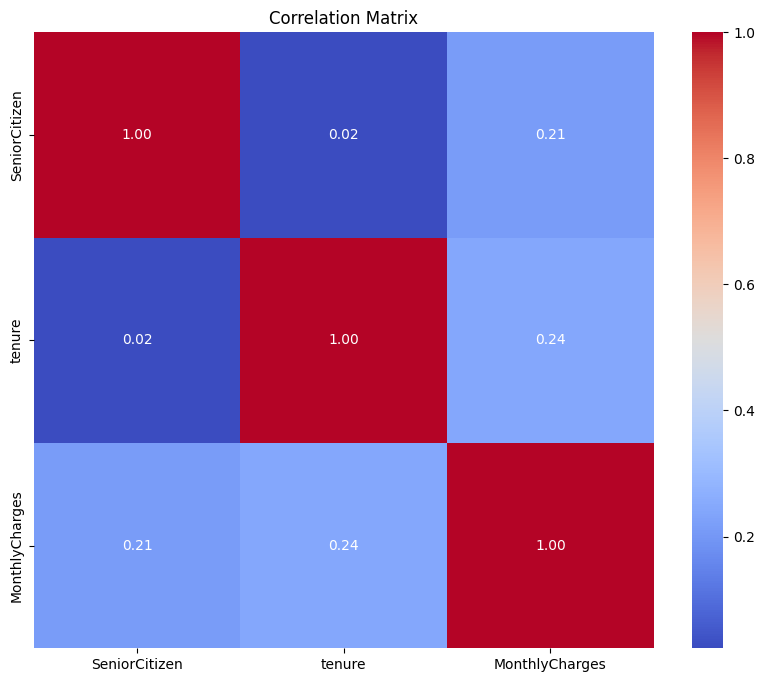

In [231]:
corr = train.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

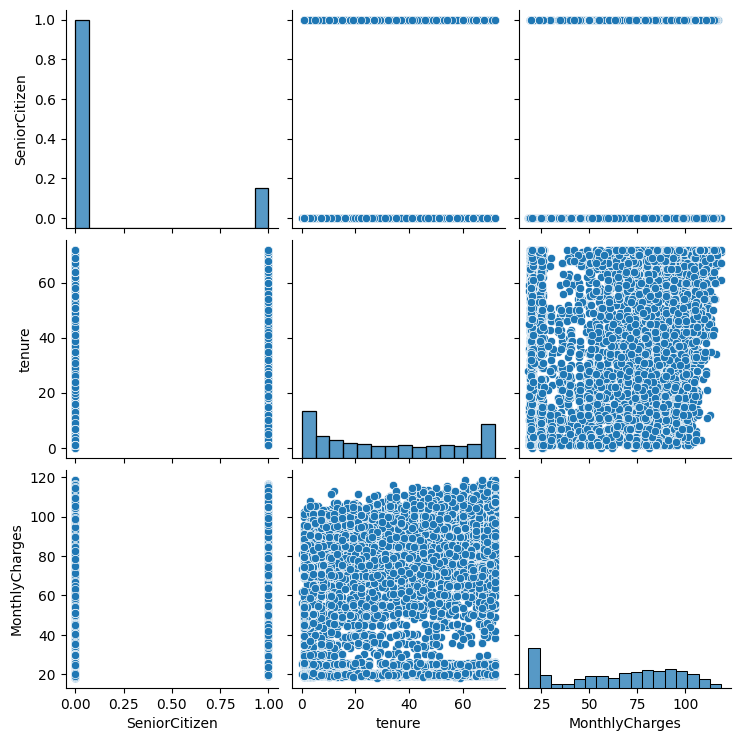

In [232]:
sns.pairplot(train[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])
plt.show()

## Feature Engineering

New features are created

In [233]:
# Convert Contract type to numeric (if needed)
train['Contract'] = train['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
train['Tenure_Contract'] = train['tenure'] * train['Contract']

train['CLV'] = train['tenure'] * train['MonthlyCharges']

In [234]:
#Convert Contract type to numeric (if needed)
test['Contract'] = test['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
test['Tenure_Contract'] = test['tenure'] * test['Contract']

test['CLV'] = test['tenure'] * test['MonthlyCharges']

## Data Pre-processing

### Removing unwanted columns

In [235]:
train=train.drop(['customerID'],axis=1)
test=test.drop(['customerID'],axis=1)

Converting datatype of total charges from object to float

In [236]:
# Convert 'TotalCharges' to numeric in train and test
for df in [train, test]:
    if "TotalCharges" in df.columns:
        # Convert, setting errors='coerce' will turn invalid strings into NaN
        df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

### Handling Missing Values

In [237]:
mode_value = train['gender'].mode()[0]
train['gender'] = train['gender'].fillna(mode_value)

In [238]:
mode_value = train['OnlineSecurity'].mode()[0]
train['OnlineSecurity'] = train['OnlineSecurity'].fillna(mode_value)

In [239]:
median_value = train['MonthlyCharges'].median()
train['MonthlyCharges'].fillna(median_value, inplace=True)

/tmp/ipython-input-1613696060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MonthlyCharges'].fillna(median_value, inplace=True)


In [240]:
median_value = train['CLV'].median()
train['CLV'].fillna(median_value, inplace=True)

/tmp/ipython-input-2981364919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['CLV'].fillna(median_value, inplace=True)


In [241]:
mode_value = train['TotalCharges'].mode()[0]
train['TotalCharges'] = train['TotalCharges'].fillna(mode_value)

In [242]:
train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [243]:
mode_value = test['TotalCharges'].mode()[0]
test['TotalCharges'] = test['TotalCharges'].fillna(mode_value)

In [244]:
test.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Scaling

In [245]:
numeric_cols = train.select_dtypes(include=["int64","float64"]).columns

# Exclude SeniorCitizen as it is already in terms of 1 and 0 (binary encoding)
numeric_cols = numeric_cols.drop("SeniorCitizen")

# Initialize scaler
scaler = StandardScaler()

# Fit on train numeric columns, transform both train and test
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,Female,0,No,No,0.097232,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,0.326669,No,Mailed check,-1.541793,-0.648112,No,-0.046419,-0.687062
1,Female,0,No,No,-0.187173,No,No phone service,DSL,No,No,...,No,No,-0.822440,Yes,Mailed check,-1.024876,-0.532820,No,-0.694976,-0.562708
2,Male,0,No,No,0.950447,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,-0.822440,No,Electronic check,1.141008,1.508207,No,-0.648650,1.483361
3,Male,0,Yes,No,0.259749,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,1.580243,Yes,Bank transfer (automatic),-1.552131,-0.608547,No,0.807294,-0.654791
4,Female,0,Yes,Yes,0.422266,No,No phone service,DSL,No,Yes,...,Yes,No,0.326669,Yes,Bank transfer (automatic),-0.490728,-0.006973,No,0.112412,-0.018331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,0.747300,Yes,No,Fiber optic,No,Yes,...,Yes,Yes,-0.822440,Yes,Electronic check,1.154792,1.268346,No,-0.656923,1.269458
5630,Male,1,Yes,No,1.437998,No,No phone service,DSL,Yes,Yes,...,No,No,1.580243,Yes,Electronic check,-0.811217,0.352730,No,1.958814,0.275345
5631,Male,0,Yes,Yes,1.600515,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,1.580243,No,Bank transfer (automatic),-1.569362,-0.373127,No,2.117644,-0.365641
5632,Female,0,No,No,1.478627,Yes,No,DSL,No,No,...,Yes,Yes,1.580243,Yes,Credit card (automatic),0.584460,1.496831,No,1.998522,1.559151


### Encoding

Converting all Yes/No columns into binary

In [246]:
# Clean Yes/No + "No service" type columns
for df in [train, test]:
    for col in df.select_dtypes(include=["object"]).columns:
        # Standardize 'No internet service' and 'No phone service' to 'No'
        df[col] = df[col].replace({
            'No internet service': 'No',
            'No phone service': 'No'
        })

        # If column now has only Yes/No, convert to binary
        if set(df[col].dropna().unique()) == {"Yes", "No"}:
            df[col] = df[col].map({"Yes": 1, "No": 0})

print("Merged 'No service' into 'No' and converted to binary.")

Merged 'No service' into 'No' and converted to binary.


In [247]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,Female,0,0,0,0.097232,1,0,No,0,0,...,0,0,0.326669,0,Mailed check,-1.541793,-0.648112,0,-0.046419,-0.687062
1,Female,0,0,0,-0.187173,0,0,DSL,0,0,...,0,0,-0.822440,1,Mailed check,-1.024876,-0.532820,0,-0.694976,-0.562708
2,Male,0,0,0,0.950447,1,1,Fiber optic,0,1,...,1,1,-0.822440,0,Electronic check,1.141008,1.508207,0,-0.648650,1.483361
3,Male,0,1,0,0.259749,1,0,No,0,0,...,0,0,1.580243,1,Bank transfer (automatic),-1.552131,-0.608547,0,0.807294,-0.654791
4,Female,0,1,1,0.422266,0,0,DSL,0,1,...,1,0,0.326669,1,Bank transfer (automatic),-0.490728,-0.006973,0,0.112412,-0.018331


Label encoding for column named gender

In [248]:
le = LabelEncoder()

for df in [train, test]:
    if "gender" in df.columns:
        df["gender"] = le.fit_transform(df["gender"])

One Hot encoding for rest of the categotical columns

In [249]:
train= pd.get_dummies(train, columns = ['InternetService','PaymentMethod'],dtype=int,prefix=['Internetservice','Paymentmethod'])
test = pd.get_dummies(test, columns = ['InternetService','PaymentMethod'],dtype=int,prefix=['Internetservice','Paymentmethod'])

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   SeniorCitizen                            5634 non-null   int64  
 2   Partner                                  5634 non-null   int64  
 3   Dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   float64
 5   PhoneService                             5634 non-null   int64  
 6   MultipleLines                            5634 non-null   int64  
 7   OnlineSecurity                           5634 non-null   int64  
 8   OnlineBackup                             5634 non-null   int64  
 9   DeviceProtection                         5634 non-null   int64  
 10  TechSupport                              5634 no

In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1409 non-null   int64  
 1   SeniorCitizen                            1409 non-null   int64  
 2   Partner                                  1409 non-null   int64  
 3   Dependents                               1409 non-null   int64  
 4   tenure                                   1409 non-null   float64
 5   PhoneService                             1409 non-null   int64  
 6   MultipleLines                            1409 non-null   int64  
 7   OnlineSecurity                           1409 non-null   int64  
 8   OnlineBackup                             1409 non-null   int64  
 9   DeviceProtection                         1409 non-null   int64  
 10  TechSupport                              1409 no

In [252]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Tenure_Contract,CLV,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,0,0,0,0.097232,1,0,0,0,0,...,0,-0.046419,-0.687062,0,0,1,0,0,0,1
1,0,0,0,0,-0.187173,0,0,0,0,1,...,0,-0.694976,-0.562708,1,0,0,0,0,0,1
2,1,0,0,0,0.950447,1,1,0,1,0,...,0,-0.648650,1.483361,0,1,0,0,0,1,0
3,1,0,1,0,0.259749,1,0,0,0,0,...,0,0.807294,-0.654791,0,0,1,1,0,0,0
4,0,0,1,1,0.422266,0,0,0,1,0,...,0,0.112412,-0.018331,1,0,0,1,0,0,0


In [253]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Tenure_Contract,CLV,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,1,0,1,1,0.300378,1,1,0,0,1,...,0,-0.675122,0.454307,0,1,0,0,0,1,0
1,0,0,1,0,-0.837242,1,1,1,0,1,...,0,-0.503056,-0.587511,1,0,0,0,0,1,0
2,1,0,0,0,0.422266,1,1,0,0,0,...,1,0.112412,0.930453,0,1,0,0,0,1,0
3,1,0,0,0,1.600515,1,1,1,1,1,...,0,2.117644,2.836122,0,1,0,0,0,1,0
4,0,0,0,0,-0.918500,0,0,0,1,0,...,0,-0.724756,-0.851699,1,0,0,0,0,1,0


## Model Development

Test and Train splitting

In [254]:
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']

X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

Model Implementation
1. Logistic Regression
2. k-NN
3. Random Forest

In [255]:
# building logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train) # training the model

y_pred_log = log_reg_model.predict(X_test) # predicting the model

# evaluate the model
accuracy_log = accuracy_score(y_test,y_pred_log)
precision_log = precision_score(y_test,y_pred_log,average='weighted')
recall_log = recall_score(y_test,y_pred_log,average='weighted')
f1_log = f1_score(y_test,y_pred_log,average='weighted')

print("Accuracy: ",accuracy_log)
print("Precision: ",precision_log)
print("Recall: ",recall_log)
print("F1 Score: ",f1_log)

Accuracy:  0.8161816891412349
Precision:  0.8085336697296603
Recall:  0.8161816891412349
F1 Score:  0.8106259406137347


In [256]:
# building k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train) # training of the model

y_pred_knn=knn_model.predict(X_test) # predicting the model

# evaluate the model
accuracy_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn,average='weighted')
recall_knn = recall_score(y_test,y_pred_knn,average='weighted')
f1_knn = f1_score(y_test,y_pred_knn,average='weighted')

print("Accuracy: ",accuracy_knn)
print("Precision: ",precision_knn)
print("Recall: ",recall_knn)
print("F1 Score: ",f1_knn)

Accuracy:  0.7572746628814763
Precision:  0.7581443142323546
Recall:  0.7572746628814763
F1 Score:  0.7577030980395902


In [257]:
# building random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train) # training of the model

y_pred_rf=rf_model.predict(X_test) # prediction of model

# evaluating the model
accuracy_rf = accuracy_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf,average='weighted')
recall_rf = recall_score(y_test,y_pred_rf,average='weighted')
f1_rf = f1_score(y_test,y_pred_rf,average='weighted')

print("Accuracy: ",accuracy_rf)
print("Precision: ",precision_rf)
print("Recall: ",recall_rf)
print("F1 Score: ",f1_rf)

Accuracy:  0.7856635911994322
Precision:  0.7739204816552394
Recall:  0.7856635911994322
F1 Score:  0.7772426018749689


Model Comparison

In [258]:
data = {
    'Model': ['Logistic Regression','k-Nearest Neighbour Classification', 'Random Forest'],
    'Accuracy': [accuracy_log, accuracy_knn, accuracy_rf],
    'Recall': [recall_log, recall_knn, recall_rf],
    'Precision': [precision_log, precision_knn, precision_rf],
    'F1 Score': [f1_log, f1_knn, f1_rf]
}

df = pd.DataFrame(data)

print("\t \t \t \t Model Comparison \n")
print(df)

	 	 	 	 Model Comparison 

                                Model  Accuracy    Recall  Precision  F1 Score
0                 Logistic Regression  0.816182  0.816182   0.808534  0.810626
1  k-Nearest Neighbour Classification  0.757275  0.757275   0.758144  0.757703
2                       Random Forest  0.785664  0.785664   0.773920  0.777243


From the above comparison we conclude that Logistic Regression Model has performed the best because it gives the highest values of Accuracy, Recall, Precision and F1 score of the three models

## Model Fine-Tuning

In churn prediction, Recall is the most important metric because missing a churner (False Negative) is more costly than mistakenly targeting a non-churner (False Positive). Optimizing for Recall ensures the model captures as many at-risk customers as possible, helping the business reduce customer loss.

In [259]:
# Logistic Regression tuning
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],   # Regularization strength
    'penalty': ['l2'],         # Stable choice
    'solver': ['lbfgs', 'saga']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                        param_grid=param_grid_log,
                        cv=5,
                        scoring='recall',
                        n_jobs=-1)

grid_log.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_log.best_params_)

Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [260]:
# Define a smaller parameter space
param_dist_fast = {
    'n_estimators': [100, 200],          # fewer tree options
    'max_depth': [10, 20, None],         # reasonable depth choices
    'min_samples_split': [2, 5],         # common splits
    'min_samples_leaf': [1, 2],          # small leaves
    'max_features': ['sqrt', 'log2'],    # best for classification
    'bootstrap': [True]                  # standard bagging
}

rf = RandomForestClassifier(random_state=42)

# RandomizedSearch with fewer iterations + CV folds
random_search_fast = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_fast,
    n_iter=15,              # only 15 random combos
    cv=3,                   # 3-fold CV (faster)
    scoring='recall',      # churn is recall sensitive
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search_fast.fit(X_train, y_train)

# Best results
print("Best Parameters (Fast RF):", random_search_fast.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters (Fast RF): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [261]:
# Best tuned models
best_log = grid_log.best_estimator_     # from Logistic Regression GridSearch
best_rf = random_search_fast.best_estimator_   # from Random Forest RandomizedSearch

# Predictions
y_pred_log = best_log.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Function to calculate metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Collect results
results = {
    "Logistic Regression (Tuned)": evaluate_model(y_test, y_pred_log),
    "Random Forest (Tuned)": evaluate_model(y_test, y_pred_rf)
}

# Display as DataFrame for clarity
results_df = pd.DataFrame(results)
print(results_df)


           Logistic Regression (Tuned)  Random Forest (Tuned)
Accuracy                      0.816891               0.801987
Precision                     0.674267               0.643333
Recall                        0.567123               0.528767
F1-score                      0.616071               0.580451


Hyperparameter tuning did not improve performance; in fact, both Logistic Regression and Random Forest showed reduced recall after tuning. Since recall is crucial in churn prediction, the baseline Logistic Regression model was selected as the final model, achieving 81.6% accuracy, 81.6% recall, 80.8% precision, and an F1-score of 81.0%.

## Cross Validation

In [262]:
# Define models
model_log_reg = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores for logistic regression
cv_log = cross_val_score(model_log_reg, X_train, y_train, cv=kf)

print("Logistic Regression Cross-Validation Scores:", cv_log)
print("Logistic Regression mean Cross-Validation Scores:",cv_log.mean())

Logistic Regression Cross-Validation Scores: [0.79236912 0.80834073 0.78704525 0.80390417 0.80728242]
Logistic Regression mean Cross-Validation Scores: 0.7997883376070329


In [263]:
# for Random forest Classifier
cv_rf = cross_val_score(model_rf, X_train, y_train, cv=kf)

print("Random Forest Cross-Validation Scores:", cv_rf)
print("Random Forest mean Cross-Validation Scores:",cv_rf.mean())

Random Forest Cross-Validation Scores: [0.78615794 0.79325643 0.79769299 0.78793256 0.77087034]
Random Forest mean Cross-Validation Scores: 0.7871820532985765


In [264]:
# for k-NN
cv_knn = cross_val_score(model_knn, X_train, y_train, cv=kf)

print("k-NN Cross-Validation Scores:", cv_knn)
print("k-NN mean Cross-Validation Scores:",cv_knn.mean())

k-NN Cross-Validation Scores: [0.74889086 0.77639752 0.77462289 0.76397516 0.75399645]
k-NN mean Cross-Validation Scores: 0.7635765743474006


## Bagging

In [265]:
# normal decision tree training
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

y_pred_DT = model_DT.predict(X_test)
recall_DT = recall_score(y_test, y_pred_DT)

print(f"Decision Tree Recall: {recall_DT}")

# bagging of decision tree
bagging_model_DT = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,      # number of trees in the ensemble
    max_samples=0.8,      # each tree trained on 80% random subset
    bootstrap=True,       # sampling with replacement
    random_state=42,
)

bagging_model_DT.fit(X_train, y_train)
y_pred_bagging_DT = bagging_model_DT.predict(X_test)
recall_bagging_DT = recall_score(y_test, y_pred_bagging_DT)

print(f"Bagging Recall: {recall_bagging_DT}")

Decision Tree Recall: 0.536986301369863
Bagging Recall: 0.4383561643835616


## Boosting

In [266]:
# using decision tree model built earlier
print(f"Decision Tree Recall: {recall_DT}")


# AdaBoost Classifier with Decision Tree
ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# learning_rate=0.5 -> model updates in smaller steps (slower but often better)
# n_estimators=100 -> runs 10 boosting rounds
# max_depth=1 -> stump trees (weak learners)

ada_boost_clf.fit(X_train, y_train)      # training
y_pred_ada_boost = ada_boost_clf.predict(X_test)   # prediction

recall_ada_boost = recall_score(y_test, y_pred_ada_boost)
print(f"AdaBoost Recall: {recall_ada_boost}")


Decision Tree Recall: 0.536986301369863
AdaBoost Recall: 0.5232876712328767


### Stacking

In [267]:
# Define base learners
model_LR_1 = LogisticRegression(max_iter=150, random_state=42)
model_DT_1 = DecisionTreeClassifier(random_state=42)
model_KNN_1 = KNeighborsClassifier(n_neighbors=3)

base_learners = [
    ('lr', model_LR_1),
    ('dt', model_DT_1),
    ('knn', model_KNN_1)
]


# Define meta learner
meta_learner = GaussianNB()  # final classifier that combines base models


# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    n_jobs=-1
)

stacking_clf.fit(X_train, y_train)          # training
y_pred_stacking = stacking_clf.predict(X_test)  # prediction

recall_stacking = recall_score(y_test, y_pred_stacking)
print(f"Stacking Model Recall: {recall_stacking:.4f}")


Stacking Model Recall: 0.6411


Comparison of recall values

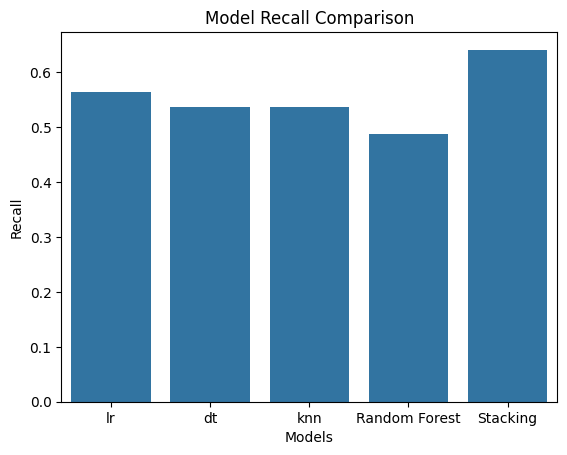

In [268]:
# Compare base learners
results = {}  # dictionary to store (model_name : recall)

for name, model in base_learners:   # base_learners already defined earlier
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    results[name] = recall

# Add Random Forest separately
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, y_pred_rf)
results['Random Forest'] = recall_rf

# Add Stacking model recall
recall_stacking = recall_score(y_test, y_pred_stacking)
results['Stacking'] = recall_stacking

# Plot comparison
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Model Recall Comparison")
plt.show()


Out of the 5 models, stacking has the highest recall value

Pickle file generation

In [269]:
import pickle # used to create a pickle file
# creating pickle file
with open('lr_model.pkl', 'wb') as file: # write binary-wb
    pickle.dump(rf_model, file)

In [270]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Tenure_Contract,CLV,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,1,0,1,1,0.300378,1,1,0,0,1,...,0.497005,-0.675122,0.454307,0,1,0,0,0,1,0
1,0,0,1,0,-0.837242,1,1,1,0,1,...,-0.570220,-0.503056,-0.587511,1,0,0,0,0,1,0
2,1,0,0,0,0.422266,1,1,0,0,0,...,0.903143,0.112412,0.930453,0,1,0,0,0,1,0
3,1,0,0,0,1.600515,1,1,1,1,1,...,2.818673,2.117644,2.836122,0,1,0,0,0,1,0
4,0,0,0,0,-0.918500,0,0,0,1,0,...,-0.792342,-0.724756,-0.851699,1,0,0,0,0,1,0
